In [1]:

library(ggplot2)
library(data.table)
library(mlbench)
library(caret)
library(caTools)
library(ROCR)
library(dplyr)
library(e1071)
library(randomForest)


Loading required package: lattice


Attaching package: ‘dplyr’


The following objects are masked from ‘package:data.table’:

    between, first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:dplyr’:

    combine


The following object is masked from ‘package:ggplot2’:

    margin




### q1

we do some EDA on our data to indicate that our features are good enough to have a model for predicting or not.



In [130]:

d <- fread('/content/diabetes_binary_health_indicators_BRFSS2015.csv', encoding = 'UTF-8')
d <- d[!duplicated(d), ]
d <- na.omit(d)
colnames(d)[1] = "Diabetes"
head(d)



Diabetes,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,⋯,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,1,1,1,40,1,0,0,0,0,⋯,1,0,5,18,15,1,0,9,4,3
0,0,0,0,25,1,0,0,1,0,⋯,0,1,3,0,0,0,0,7,6,1
0,1,1,1,28,0,0,0,0,1,⋯,1,1,5,30,30,1,0,9,4,8
0,1,0,1,27,0,0,0,1,1,⋯,1,0,2,0,0,0,0,11,3,6
0,1,1,1,24,0,0,0,1,1,⋯,1,0,2,3,0,0,0,11,5,4
0,1,1,1,25,1,0,0,1,1,⋯,1,0,2,0,2,0,1,10,6,8


we read dataset and drop duplicate and null values.
we have 22 column and there are 21 features that may have effect on a diabetes.
all of the features are numerical(some of them are categorical but theis values are number)


In [131]:
str(d)
summary(d)

Classes ‘data.table’ and 'data.frame':	229474 obs. of  22 variables:
 $ Diabetes            : num  0 0 0 0 0 0 0 0 1 0 ...
 $ HighBP              : num  1 0 1 1 1 1 1 1 1 0 ...
 $ HighChol            : num  1 0 1 0 1 1 0 1 1 0 ...
 $ CholCheck           : num  1 0 1 1 1 1 1 1 1 1 ...
 $ BMI                 : num  40 25 28 27 24 25 30 25 30 24 ...
 $ Smoker              : num  1 1 0 0 0 1 1 1 1 0 ...
 $ Stroke              : num  0 0 0 0 0 0 0 0 0 0 ...
 $ HeartDiseaseorAttack: num  0 0 0 0 0 0 0 0 1 0 ...
 $ PhysActivity        : num  0 1 0 1 1 1 0 1 0 0 ...
 $ Fruits              : num  0 0 1 1 1 1 0 0 1 0 ...
 $ Veggies             : num  1 0 0 1 1 1 0 1 1 1 ...
 $ HvyAlcoholConsump   : num  0 0 0 0 0 0 0 0 0 0 ...
 $ AnyHealthcare       : num  1 0 1 1 1 1 1 1 1 1 ...
 $ NoDocbcCost         : num  0 1 1 0 0 0 0 0 0 0 ...
 $ GenHlth             : num  5 3 5 2 2 2 3 3 5 2 ...
 $ MentHlth            : num  18 0 30 0 3 0 0 0 30 0 ...
 $ PhysHlth            : num  15 0 30 0 0 2 14 0 30 0 

    Diabetes          HighBP          HighChol        CholCheck     
 Min.   :0.0000   Min.   :0.0000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:1.0000  
 Median :0.0000   Median :0.0000   Median :0.0000   Median :1.0000  
 Mean   :0.1529   Mean   :0.4543   Mean   :0.4416   Mean   :0.9595  
 3rd Qu.:0.0000   3rd Qu.:1.0000   3rd Qu.:1.0000   3rd Qu.:1.0000  
 Max.   :1.0000   Max.   :1.0000   Max.   :1.0000   Max.   :1.0000  
      BMI            Smoker           Stroke        HeartDiseaseorAttack
 Min.   :12.00   Min.   :0.0000   Min.   :0.00000   Min.   :0.0000      
 1st Qu.:24.00   1st Qu.:0.0000   1st Qu.:0.00000   1st Qu.:0.0000      
 Median :27.00   Median :0.0000   Median :0.00000   Median :0.0000      
 Mean   :28.69   Mean   :0.4658   Mean   :0.04482   Mean   :0.1033      
 3rd Qu.:32.00   3rd Qu.:1.0000   3rd Qu.:0.00000   3rd Qu.:0.0000      
 Max.   :98.00   Max.   :1.0000   Max.   :1.00000   Max.   :1.0000      
  Phys

as we can see all of our data are in numerical type.

In [133]:
cor_matrix = cor(d)[, "Diabetes"]
print(cor_matrix)

            Diabetes               HighBP             HighChol 
          1.00000000           0.25431802           0.19494411 
           CholCheck                  BMI               Smoker 
          0.07252338           0.20508596           0.04550399 
              Stroke HeartDiseaseorAttack         PhysActivity 
          0.09919330           0.16821317          -0.10040433 
              Fruits              Veggies    HvyAlcoholConsump 
         -0.02480534          -0.04173376          -0.06595002 
       AnyHealthcare          NoDocbcCost              GenHlth 
          0.02533134           0.02004828           0.27693982 
            MentHlth             PhysHlth             DiffWalk 
          0.05415268           0.15621083           0.20530219 
                 Sex                  Age            Education 
          0.03272416           0.17726335          -0.10268615 
              Income 
         -0.14065874 


we dont have a specific feature with high correlation with diabates and the max correlated feature is High blood pressure

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


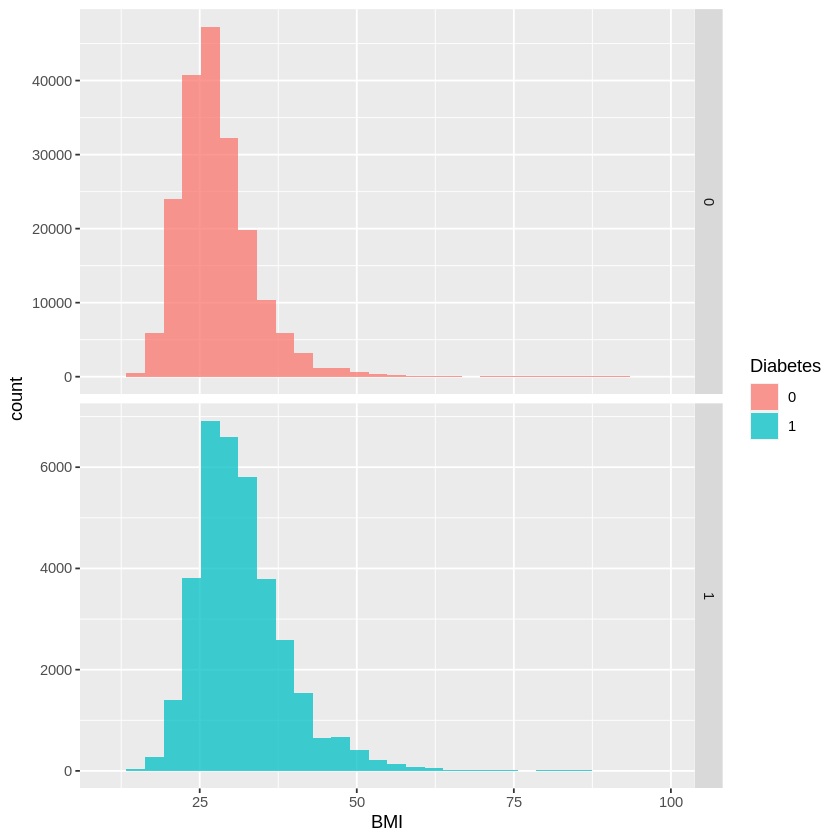

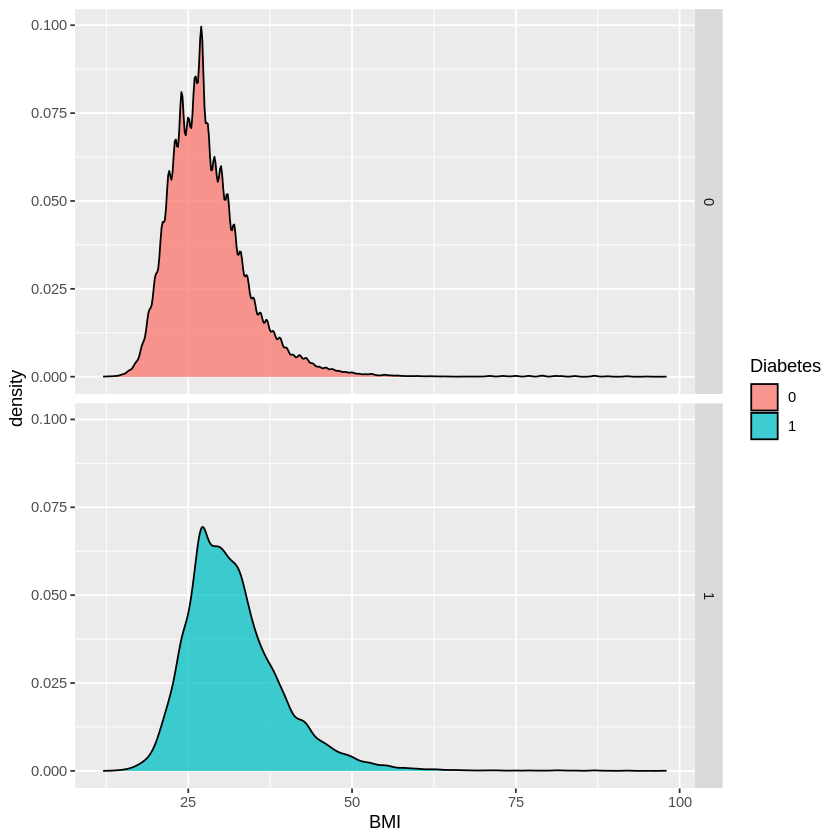

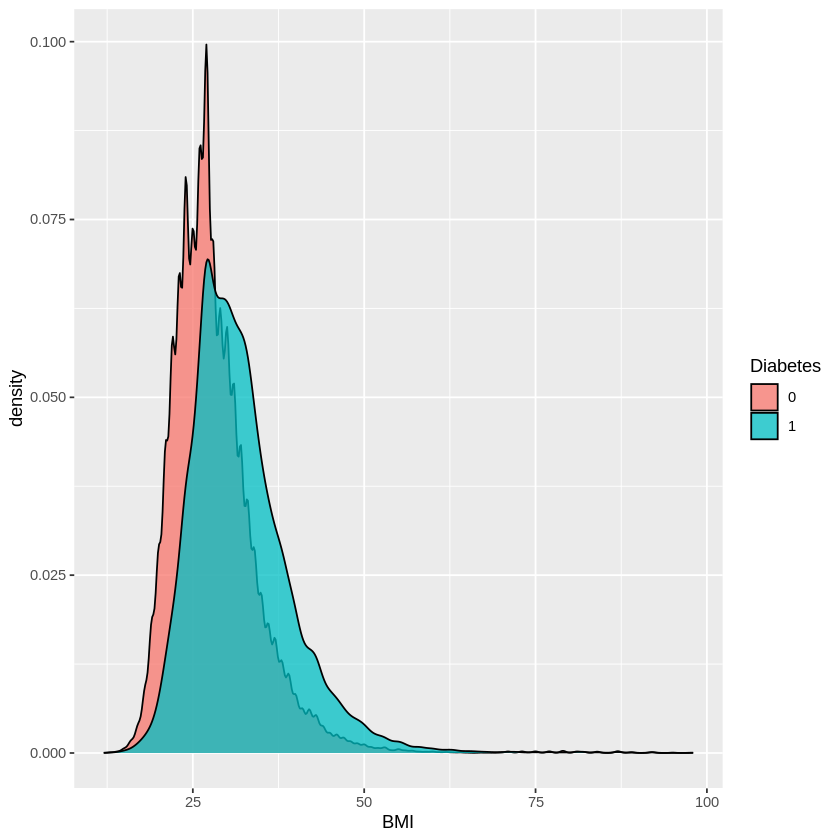

In [135]:

d$Diabetes = as.factor(d$Diabetes)

ggplot(d , aes(BMI, fill = Diabetes)) +
  geom_histogram(alpha = .75) +
  facet_grid(Diabetes ~ ., scales = 'free_y')


ggplot(d , aes(BMI, fill = Diabetes)) +
  geom_density(alpha = .75) +
  facet_grid(Diabetes ~ .)


ggplot(d , aes(BMI, fill = Diabetes)) +
  geom_density(alpha = .75)

we analyse BMI feature, as we can see in histogram plot (first plot), our data is unbalanced. so we use density plot and concider this issue to check other balance data in other notebook.
by having to plot together, we conclude that,in average, a diabeted person have higher BMI

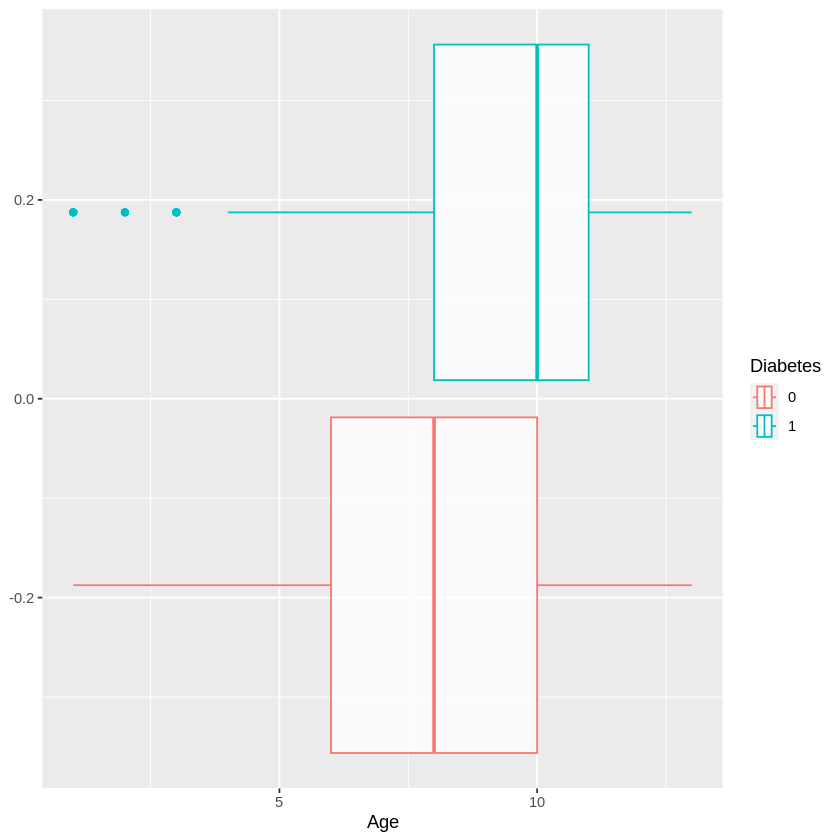

In [138]:

ggplot(d, aes(Age, group=Diabetes, color = Diabetes)) +
  geom_boxplot(alpha = 0.75)


we can see that the older person is in higher risk of having diabetes

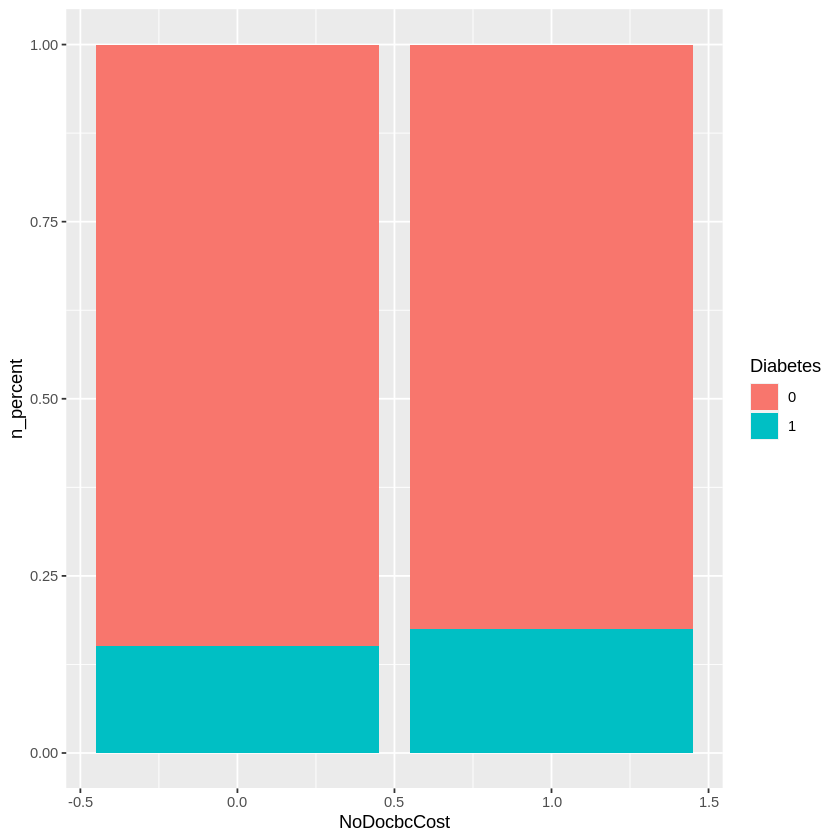

In [140]:
ds = d[, .(n = .N), .(Diabetes, NoDocbcCost)]
ds = ds[, n_total := sum(n), .(NoDocbcCost)]
ds = ds[, n_percent := n/n_total]

ggplot(ds , aes(NoDocbcCost, n_percent, fill = Diabetes)) +
  geom_bar(stat = 'identity',)



NoDocbcCost mean : Was there a time in the past 12 months when you needed to see a doctor but could not because of cost?
and we see there is a little differece in our plot so this feature is not useful and in next chapter we see it by metrics

In [142]:

ds = d[, .(n = .N), .(Diabetes, Sex)]
ds = ds[, n_total := sum(n), .(Sex)]
ds = ds[, n_percent := n/n_total]

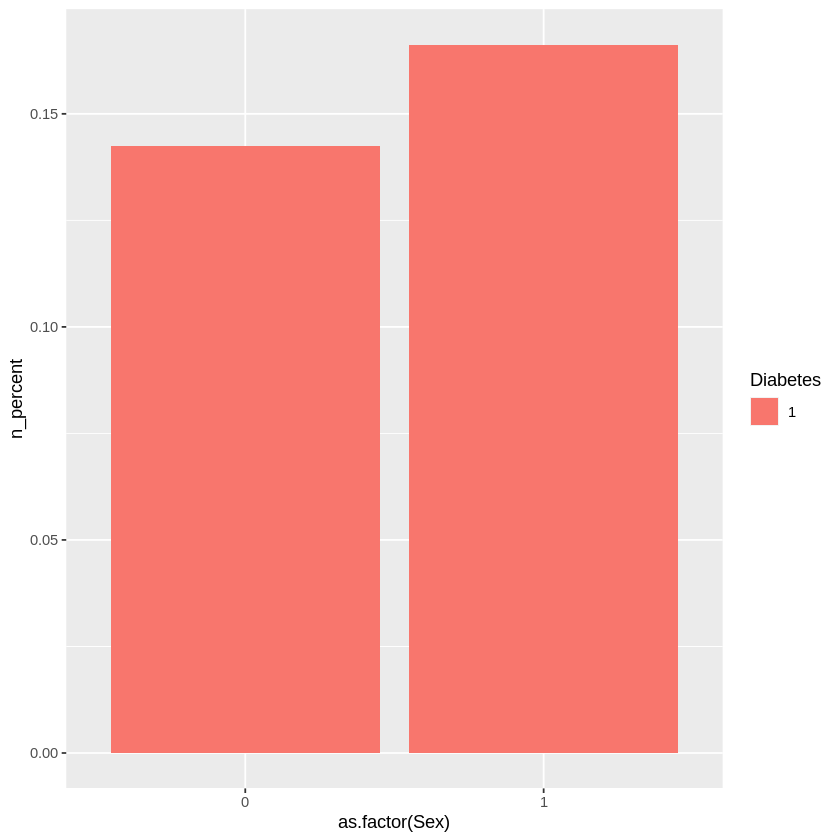

In [143]:
ggplot(ds[Diabetes!=0,] , aes(as.factor(Sex), n_percent, fill = Diabetes)) +
  geom_bar(stat = 'identity',)


in this plot we that male is in higher risk of getting diabetes.

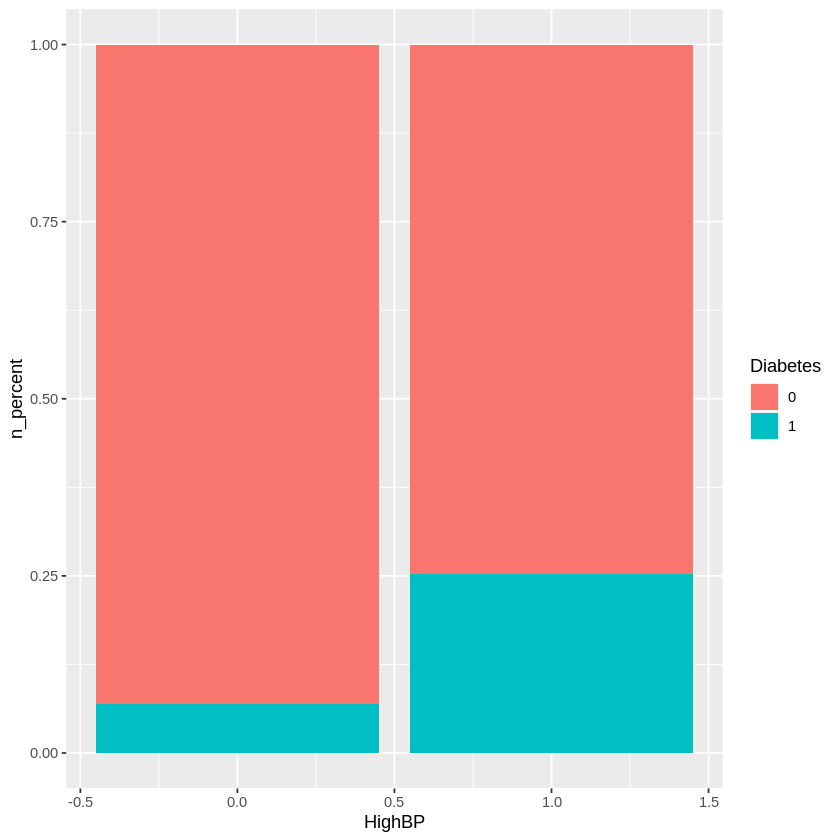

In [144]:
ds = d[, .(n = .N), .(Diabetes, HighBP)]
ds = ds[, n_total := sum(n), .(HighBP)]
ds = ds[, n_percent := n/n_total]

ggplot(ds , aes(HighBP, n_percent, fill = Diabetes)) +
  geom_bar(stat = 'identity',)


this is very good feature(as we saw its corralation with diabetes was highest )
we see that a diabetes parson have high blood pressure


our EDA shows that we  have some good features and we can go on next part

### Q2 & Q3
 variable selection and varaible importance

In [146]:
d <- fread('/content/diabetes_binary_health_indicators_BRFSS2015.csv', encoding = 'UTF-8')
d <- d[!duplicated(d), ]
d <- na.omit(d)
colnames(d)[1] = "Diabetes"
d$Diabetes = as.factor(d$Diabetes)

In [159]:
set.seed(1)
sample <- sample(c(TRUE, FALSE), nrow(d), replace=TRUE, prob=c(0.8,0.2))
train_val  <- d[sample, ]
test   <- d[!sample, ]
sample <- sample(c(TRUE, FALSE), nrow(train_val), replace=TRUE, prob=c(0.75,0.25))
train  <- train_val[sample, ]
val  <- train_val[!sample, ]
sample <- sample(c(TRUE, FALSE), nrow(train), replace=TRUE, prob=c(0.5,0.5))
train_small  <- train[sample, ]

dim(train)
dim(val)
dim(test)
dim(train_small)


[1] 41506    22

[1] 13713    22

[1] 13838    22

[1] 20673    22

first we split our data in 3 part : train test and validation

train data have nearly 140,000 row so in some methods to indicate feature importance(like random forest),we have trouble of in processing. so we use train_small group with 50% of training data to have higher speed in some sections later.


The importance of features can be estimated from data by building a model. Some methods like decision trees have a built in mechanism to report on variable importance. For other algorithms, the importance can be estimated using a ROC curve analysis conducted for each attribute.we use both approach.




The varImp is used to estimate the variable importance with ROC curve.

For classification, ROC curve analysis is conducted on each predictor. For two class problems, a series of cutoffs is applied to the predictor data to predict the class. The sensitivity and specificity are computed for each cutoff and the ROC curve is computed. The trapezoidal rule is used to compute the area under the ROC curve. This area is used as the measure of variable importance. For multi-class outcomes, the problem is decomposed into all pair-wise problems and the area under the curve is calculated for each class pair (i.e. class 1 vs. class 2, class 2 vs. class 3 etc.). For a specific class, the maximum area under
the curve across the relevant pair-wise AUC’s is used as the variable importance measure.



In [88]:
model_logistic <- glm(Diabetes ~ ., data = train, family = binomial)
variable_importance <- varImp(model_logistic, scale=False)
print(variable_importance)

                        Overall
HighBP               37.2305634
HighChol             33.8271682
CholCheck            14.9670678
BMI                  50.4509603
Smoker                1.8916202
Stroke                2.6302553
HeartDiseaseorAttack  8.0995658
PhysActivity          1.5380107
Fruits                1.0837291
Veggies               0.8413931
HvyAlcoholConsump    16.2864017
AnyHealthcare         1.7147629
NoDocbcCost           0.6281849
GenHlth              49.4018458
MentHlth              4.1883717
PhysHlth              7.6105538
DiffWalk              7.4810264
Sex                  14.6615550
Age                  33.2144421
Education             1.5851513
Income                9.0243924


The varImp is used with logistic regression model to estimate the variable importance, which is printed. It shows that the "Age", "HighBP", "HighChol" ,"BMI" , "GenHlth" attributes are the top 5 most important attributes with treshhold 30 in the dataset.


In [121]:
fitknn <- train(Diabetes~. , data=train_small, method="knn")

In [124]:
variable_importance <- varImp(fitknn, scale = FALSE)
print(variable_importance)

ROC curve variable importance

  only 20 most important variables shown (out of 21)

                     Importance
GenHlth                  0.7096
BMI                      0.6771
HighBP                   0.6705
HighChol                 0.6395
Age                      0.6350
DiffWalk                 0.6085
Income                   0.6073
PhysHlth                 0.6044
Education                0.5749
HeartDiseaseorAttack     0.5622
PhysActivity             0.5618
Smoker                   0.5329
Veggies                  0.5289
HvyAlcoholConsump        0.5249
Stroke                   0.5233
CholCheck                0.5220
Sex                      0.5190
MentHlth                 0.5175
Fruits                   0.5120
NoDocbcCost              0.5078


if we use KNN model for finding the variable importance with varImp, we see that all of the feature have nearly same importance and this is because of kNN consider nearest neighbor and we have 21 feature.knn have poor function in high diamention but we can see that top 5 important feature are the same.

####**Random forest** :  Random Forest is an ensemble learning method that combines multiple decision trees to make predictions. Each tree is built using a random subset of features, and the final prediction is determined by aggregating the predictions of all individual trees.

The feature importance in Random Forest is calculated based on how much each feature contributes to reducing the impurity or error in the model. There are several methods to measure feature importance in Random Forest, including Gini importance and Mean Decrease Impurity (MDI).

**Gini importance:** Gini importance measures the total reduction in the Gini impurity index achieved by a particular feature across all the trees in the Random Forest. **A feature with higher Gini importance indicates that it has a more significant influence** on the model's predictions. The Gini importance of a feature is calculated by summing up the Gini importance values across all the trees.

**Mean Decrease Impurity (MDI)**: MDI calculates the average decrease in impurity caused by a specific feature when it is chosen as a split in a tree. It considers the number of samples affected by the feature and the improvement in purity resulting from the split. The MDI value of a feature is calculated by averaging the decrease in impurity over all the trees.


In [125]:
install.packages(c("leaps", "MASS"))
library(randomForest)
library(leaps)
library(MASS)
variable_importance_rf <- function(d) {
  d <- as.data.frame(d)

  model <- randomForest(Diabetes ~ ., data = d, importance = TRUE)

  print(importance(model))
}


Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [129]:
variable_importance_rf(train_small)


                              0           1 MeanDecreaseAccuracy
HighBP               -26.778917  87.6624536            30.038782
HighChol             -11.914835  72.4226623            29.388451
CholCheck            -14.484991  29.1355224             4.246704
BMI                   12.000981 102.7447584            65.549534
Smoker                 8.652333  -7.5381235             3.751516
Stroke                 9.893826  10.7953460            14.646983
HeartDiseaseorAttack  18.009702  29.1364845            31.086820
PhysActivity           3.963712   5.0784561             6.426099
Fruits                 9.101084  -6.0607104             4.805489
Veggies                8.038885  -2.8976675             5.539876
HvyAlcoholConsump     -4.959890  27.6575612            10.171092
AnyHealthcare         25.334295 -14.1841018            17.171492
NoDocbcCost           25.373048  -9.6290062            18.474954
GenHlth               52.806109  66.0204786            85.762542
MentHlth              19.

with random forest result top 5 feature with gini index are :
BMI, GenHlth, PhysHlth, Age, Income
and with MDI feature is:
BMI,Age,GenHlth, DiffWalk,PhysHlth

we use forward and backward subset selection too , this help us to find best subset of feature.

In [ ]:
variable_importance_forward <- function(d) {
  d <- as.data.frame(d)
  model <- regsubsets(Diabetes ~ ., data = d, method = "forward")
  results <- summary(model)
  print(results$which)
}
variable_importance_backward <- function(d) {
  d <- as.data.frame(d)
  model <- regsubsets(Diabetes ~ ., data = d, method = "backward")
  results <- summary(model)
  print(results$which)
}


In [ ]:
variable_importance_backward(train)

  (Intercept) HighBP HighChol CholCheck   BMI Smoker Stroke
1        TRUE  FALSE    FALSE     FALSE FALSE  FALSE  FALSE
2        TRUE   TRUE    FALSE     FALSE FALSE  FALSE  FALSE
3        TRUE   TRUE    FALSE     FALSE  TRUE  FALSE  FALSE
4        TRUE   TRUE    FALSE     FALSE  TRUE  FALSE  FALSE
5        TRUE   TRUE     TRUE     FALSE  TRUE  FALSE  FALSE
6        TRUE   TRUE     TRUE     FALSE  TRUE  FALSE  FALSE
7        TRUE   TRUE     TRUE     FALSE  TRUE  FALSE  FALSE
8        TRUE   TRUE     TRUE     FALSE  TRUE  FALSE  FALSE
  HeartDiseaseorAttack PhysActivity Fruits Veggies HvyAlcoholConsump
1                FALSE        FALSE  FALSE   FALSE             FALSE
2                FALSE        FALSE  FALSE   FALSE             FALSE
3                FALSE        FALSE  FALSE   FALSE             FALSE
4                FALSE        FALSE  FALSE   FALSE             FALSE
5                FALSE        FALSE  FALSE   FALSE             FALSE
6                 TRUE        FALSE  FALSE   F

In [ ]:
variable_importance_forward(train)

  (Intercept) HighBP HighChol CholCheck   BMI Smoker Stroke
1        TRUE  FALSE    FALSE     FALSE FALSE  FALSE  FALSE
2        TRUE   TRUE    FALSE     FALSE FALSE  FALSE  FALSE
3        TRUE   TRUE    FALSE     FALSE  TRUE  FALSE  FALSE
4        TRUE   TRUE    FALSE     FALSE  TRUE  FALSE  FALSE
5        TRUE   TRUE     TRUE     FALSE  TRUE  FALSE  FALSE
6        TRUE   TRUE     TRUE     FALSE  TRUE  FALSE  FALSE
7        TRUE   TRUE     TRUE     FALSE  TRUE  FALSE  FALSE
8        TRUE   TRUE     TRUE     FALSE  TRUE  FALSE  FALSE
  HeartDiseaseorAttack PhysActivity Fruits Veggies HvyAlcoholConsump
1                FALSE        FALSE  FALSE   FALSE             FALSE
2                FALSE        FALSE  FALSE   FALSE             FALSE
3                FALSE        FALSE  FALSE   FALSE             FALSE
4                FALSE        FALSE  FALSE   FALSE             FALSE
5                FALSE        FALSE  FALSE   FALSE             FALSE
6                 TRUE        FALSE  FALSE   F

in conclusion, by considering result of all appraoch before, we choose listed features below and find best model with them for next part.
 "Age", "HighBP", "HighChol" ,"BMI" , "GenHlth"

### Q4
in this part first we do feature selection that we find in previous part

In [160]:
train = train[, c("Diabetes","Age", "HighBP", "HighChol" ,"BMI" , "GenHlth")]
test = test[, c("Diabetes","Age", "HighBP", "HighChol" ,"BMI" , "GenHlth")]
val = val[, c("Diabetes","Age", "HighBP", "HighChol" ,"BMI" , "GenHlth")]
train_val = train_val[, c("Diabetes","Age", "HighBP", "HighChol" ,"BMI" , "GenHlth")]

In [149]:
dim(train)
dim(test)
dim(val)

[1] 137746      6

[1] 46000     6

[1] 45728     6

In [150]:
sample <- sample(c(TRUE, FALSE), nrow(train), replace=TRUE, prob=c(0.01,0.99))
train_small  <- train[sample, ]

In [151]:
dim(train_small)

[1] 1339    6

we run different model in very small scale (1%)traing data and test in validation set and writing the time to indicate which approach are available by concidering the time and aquracy.

here is a function in R that uses different classification methods: Logistic Regression, Decision Trees, SVM and KNN. It uses the caret package to train the models and calculate their precision and accuracy.

In [93]:
# Install the necessary packages
#install.packages("naivebayes")

# Load the packages
library(caret)
library(e1071)
library(randomForest)
library(rpart)
library(class)
library(naivebayes)

# Define the function
classification_models <- function(train,val, models) {
  # Loop over the models
  for(model in models) {
    set.seed(123)
    st = Sys.time()
    fit <- train(Diabetes ~ ., data=train, method=model)
    predictions <- predict(fit, newdata=val)
    confusionMatrix <- confusionMatrix(predictions, val$Diabetes)
    print(paste("Model:", model))
    print(paste("Accuracy:", confusionMatrix$overall['Accuracy']))
    print(paste("Precision:", confusionMatrix$byClass['Pos Pred Value']))
    print (st)
    print(Sys.time())
  }
}



In [94]:
#models <- c("glm", "rpart", "svmRadial", "knn", "nb")
models <- c("glm")
classification_models(train_small, val, models)


[1] "Model: glm"
[1] "Accuracy: 0.845608817354794"
[1] "Precision: 0.868149730633476"
[1] "2023-07-04 04:16:53 UTC"
[1] "2023-07-04 04:16:54 UTC"


In [33]:
#models <- c("glm", "rpart", "svmRadial", "knn", "nb")
models <- c("rpart")


classification_models(train_small, val, models)


[1] "Model: rpart"
[1] "Accuracy: 0.842547235829251"
[1] "Precision: 0.865353455858525"
[1] "2023-07-04 03:28:33 UTC"
[1] "2023-07-04 03:28:34 UTC"


In [35]:
#models <- c("glm", "rpart", "svmRadial", "knn", "nb")
models <- c("knn")


classification_models(train_small, val, models)


[1] "Model: knn"
[1] "Accuracy: 0.838938943317005"
[1] "Precision: 0.868830894270748"
[1] "2023-07-04 03:29:47 UTC"
[1] "2023-07-04 03:29:51 UTC"


In [37]:
#models <- c("glm", "rpart", "knn", "rf")
models <- c("rf")


classification_models(train_small, val, models)


[1] "Model: rf"
[1] "Accuracy: 0.838807732680196"
[1] "Precision: 0.869855106608552"
[1] "2023-07-04 03:37:51 UTC"
[1] "2023-07-04 03:38:37 UTC"


In [40]:
st = Sys.time()

fit = svm(formula = Diabetes ~ ., data = train_small ,kernel = 'linear')
predictions <- predict(fit, newdata=val)
confusionMatrix <- confusionMatrix(predictions, val$Diabetes)
print(paste("Model:", "linear SVM"))
print(paste("Accuracy:", confusionMatrix$overall['Accuracy']))
print(paste("Precision:", confusionMatrix$byClass['Pos Pred Value']))
print (st)
print(Sys.time())


[1] "Model: linear SVM"
[1] "Accuracy: 0.84779566130161"
[1] "Precision: 0.84779566130161"
[1] "2023-07-04 03:42:38 UTC"
[1] "2023-07-04 03:42:39 UTC"


we can see that random forest and knn take a lots of time, and also logistic regression have good accuracy and high speed. so we choose logistic regression.


in logistic reg we have parameter of treshhold so we can try different alpha(tresh hold)for training and test on validation set to find best parameter.


In [99]:


logistic_model <- function(alpha){
    logistic_model <- glm(Diabetes ~ . , data = train, family = "binomial")
    predict_reg <- predict(logistic_model, val , type = "response")
    predictions <- ifelse(predict_reg >alpha, 1, 0)

    confusionMatrix <- confusionMatrix(as.factor(predictions), as.factor(val$Diabetes))
    print(paste("alpha:", alpha))
    print(paste("Accuracy:", confusionMatrix$overall['Accuracy']))
    print(paste("Precision:", confusionMatrix$byClass['Pos Pred Value']))
}

In [100]:
start = 0.2
end = 0.9
step = 0.03
mylist = seq(start, end, by = step)
for (i in mylist){
    print(paste("alpha: ", i))
    logistic_model(i)
}

[1] "alpha:  0.2"
[1] "alpha: 0.2"
[1] "Accuracy: 0.761918299510147"
[1] "Precision: 0.925054120803732"
[1] "alpha:  0.23"
[1] "alpha: 0.23"
[1] "Accuracy: 0.783917949615116"
[1] "Precision: 0.914602290667968"
[1] "alpha:  0.26"
[1] "alpha: 0.26"
[1] "Accuracy: 0.803249650104969"
[1] "Precision: 0.906319093762795"
[1] "alpha:  0.29"
[1] "alpha: 0.29"
[1] "Accuracy: 0.816589398180546"
[1] "Precision: 0.898376648920826"
[1] "alpha:  0.32"
[1] "alpha: 0.32"
[1] "Accuracy: 0.826955038488453"
[1] "Precision: 0.890935813293465"
[1] "alpha:  0.35"
[1] "alpha: 0.35"
[1] "Accuracy: 0.834259097270819"
[1] "Precision: 0.88431870271336"
[1] "alpha:  0.38"
[1] "alpha: 0.38"
[1] "Accuracy: 0.839223233030091"
[1] "Precision: 0.878360150303497"
[1] "alpha:  0.41"
[1] "alpha: 0.41"
[1] "Accuracy: 0.843553184044787"
[1] "Precision: 0.873634945397816"
[1] "alpha:  0.44"
[1] "alpha: 0.44"
[1] "Accuracy: 0.846549160251924"
[1] "Precision: 0.86942964186815"
[1] "alpha:  0.47"
[1] "alpha: 0.47"
[1] "Accuracy

we can see that we have highest accuery on validation set with alpha 0.56 so we do training on validation+training set and indicate final report by testing on test set that don't use in any observation and anylising

In [161]:
alpha  = 0.56
logistic_model <- glm(Diabetes ~ . , data = train_val, family = "binomial")
predict_reg <- predict(logistic_model, test , type = "response")
predictions <- ifelse(predict_reg >alpha, 1, 0)

confusionMatrix <- confusionMatrix(as.factor(predictions), as.factor(test$Diabetes))
print(paste("alpha:", alpha))
print(paste("Accuracy:", confusionMatrix$overall['Accuracy']))
print(paste("Precision:", confusionMatrix$byClass['Pos Pred Value']))



[1] "alpha: 0.56"
[1] "Accuracy: 0.738112443994797"
[1] "Precision: 0.720484915277586"


In [162]:
ROCPred <- prediction(predictions, test$Diabetes)
ROCPer <- performance(ROCPred, measure = "tpr",
                             x.measure = "fpr")

auc <- performance(ROCPred, measure = "auc")
auc <- auc@y.values[[1]]
auc



[1] 0.7384903

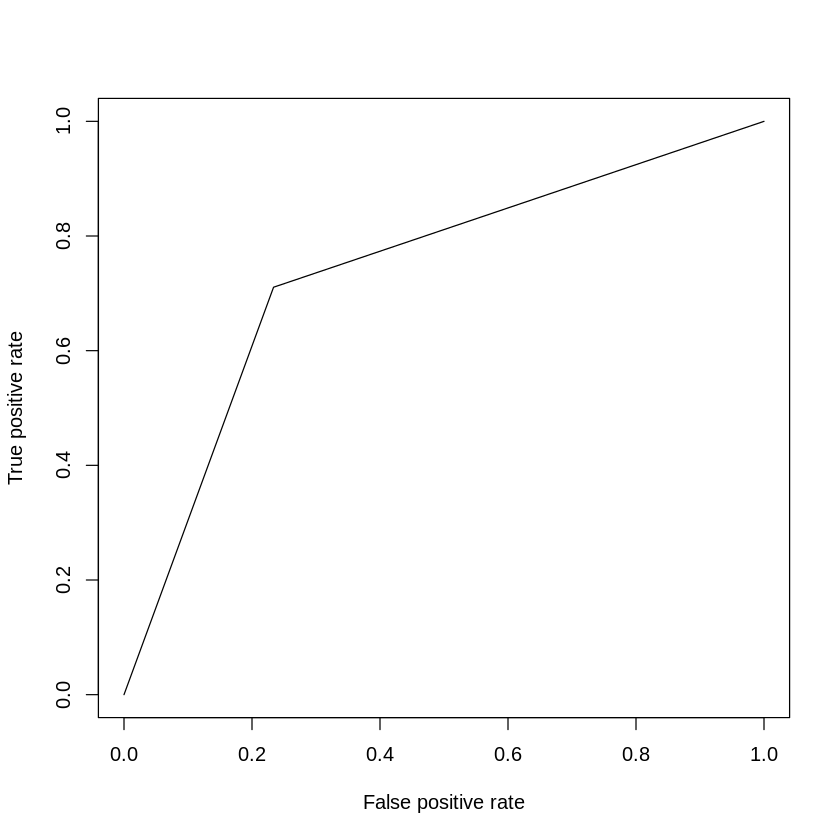

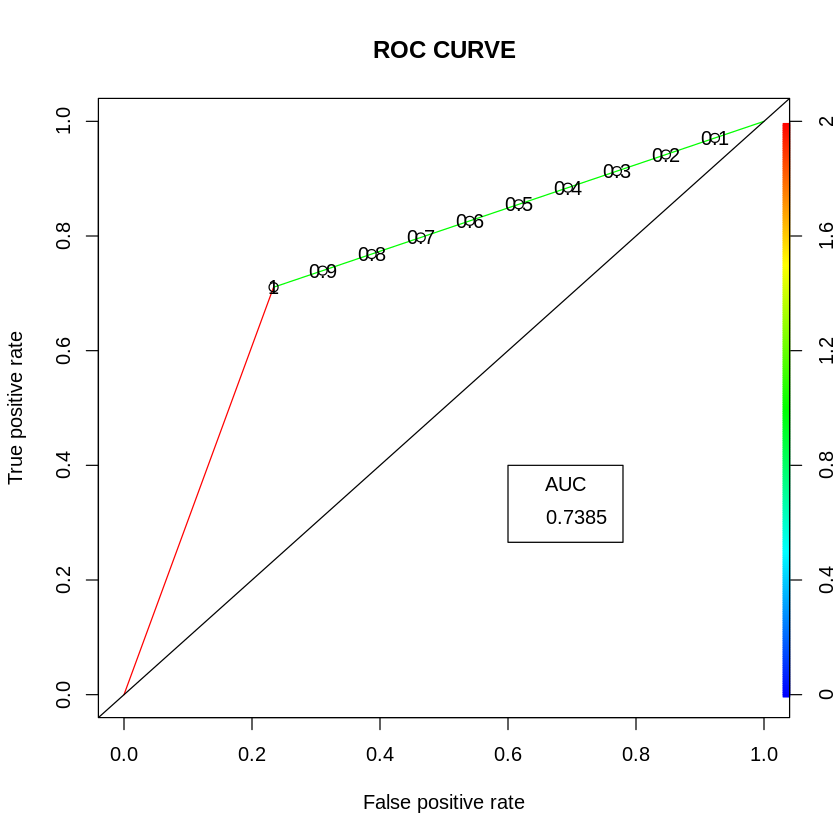

In [163]:
# ROC-AUC Curve

library(caTools)
library(ROCR)

plot(ROCPer)
plot(ROCPer, colorize = TRUE,
     print.cutoffs.at = seq(0.1, by = 0.1),
     main = "ROC CURVE")
abline(a = 0, b = 1)

auc <- round(auc, 4)
legend(.6, .4, auc, title = "AUC", cex = 1)

### Q5
kNN is nonparametric model and is not good enaugh and have a very high Computational cost because it need to find distance every time and doesnt have very good accuracy .random forest and logistic reg are very good in this case
but for random forest we have very high Computational cost for training but it has higher aqquracy.it need a lot of data for training too!
if we have trained model, it is better to use RF for predicting but if we don't have model and want to considering training too, it is better to use logistic because it has acceptable accuray.

### cell below compute different model but it take alot of time, so i dont run it :)

in this part we use balance data too!
it has fewer data so we can use more model and find result on it and compare its aqquracy with prevous part.

In [158]:
d <- fread('/content/diabetes_binary_5050split_health_indicators_BRFSS2015.csv', encoding = 'UTF-8')
d <- d[!duplicated(d), ]
d <- na.omit(d)
colnames(d)[1] = "Diabetes"
d$Diabetes = as.factor(d$Diabetes)


d = d[, c("Diabetes","Age", "HighBP", "HighChol" ,"BMI" , "GenHlth")]
set.seed(1)
sample <- sample(c(TRUE, FALSE), nrow(d), replace=TRUE, prob=c(0.8,0.2))
train_val  <- d[sample, ]
test   <- d[!sample, ]
sample <- sample(c(TRUE, FALSE), nrow(train_val), replace=TRUE, prob=c(0.75,0.25))
train  <- train_val[sample, ]
val  <- train_val[!sample, ]
sample <- sample(c(TRUE, FALSE), nrow(train), replace=TRUE, prob=c(0.5,0.5))
train_small  <- train[sample, ]

dim(train)
dim(val)
dim(test)
dim(train_small)


[1] 41506    22

[1] 13713    22

[1] 13838    22

[1] 20673    22

In [ ]:
library(caret)
control <- trainControl(method="cv", number=5)
metric <- "Accuracy"
set.seed(3)
fit.tree <- train(Diabetes_binary~., data=d2m, method="rpart", metric=metric, trControl=control)
set.seed(3)
fit.rf <- train(Diabetes_binary~., data=d2m, method="rf", metric=metric, trControl=control, ntree = 60, nodesize = c(1, 5))
set.seed(3)
fit.knn <- train(Diabetes_binary~., data=d2m, method="knn", metric=metric, trControl=control)
set.seed(3)
fit.lr <- train(Diabetes_binary~., data=d2m, method="glm", metric=metric, trControl=control)
set.seed(3)
fit.nb <- train(Diabetes_binary~., data=d2m, method="nb", metric=metric, trControl=control)



compare accuracy of models results <- resamples(list(DT=fit.tree, RF=fit.rf, knn=fit.knn, LR=fit.lr, NB=fit.nb)) dotplot(results)
